# Introdução

**Resumo:**

O exemplo aqui desenvolvido tem como objetivo apresentar conceitos iniciais de implementação de redes neurais com python e tensorflow/keras. Esse modelo apresenta um modelo MLP básico que pode ser expandido mudando o número de neurônios e camadas. Em adaptações mais avançadas, pode-se estudar possibilidade de otimização de hyperparâmetros e outras técnincas como aumento de dados.

**Não é objetivo nosso desenvolver e otimizar o modelo de classificação**. O exemplo tem objetivo meramente didático.

---

**Para saber mais:**
* [Palestras e cursos do Ocean](http://www.oceanbrasil.com/)
* François Chollet. Deep Learning with Python. Manning Publications, 2017.
* Ian Goodfellow and Yoshua Bengio and Aaron Courville. [Deep Learning](https://www.deeplearningbook.org/). MIT Press, 2016.

# Bibliotecas e Dados

In [39]:
# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
# Redes Neurais
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
# Avaliação
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
# Lendo o dataset Kaggle
train = pd.read_csv("../input/digit-recognizer/train.csv")

#Alternativa ler do próprio keras
#(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [41]:
# Analisando o dataset
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  

In [42]:
# Separando x_train e y_train
Y = train["label"] #saida
X = train.drop(labels = ["label"],axis = 1) #entrada
print(X.head())
# Em formato numpy array de imagens 28 x 28
#x = X.values.reshape(-1,28,28,1)
#print(x[0])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [43]:
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


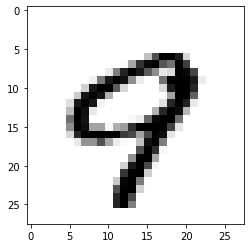

Label: 1


In [44]:
# Numtendi nada!
# Bora ver com matplotlib
plt.imshow(X.values[100].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[0]))

In [45]:
# Transformando a imagem 2d em um numpy array (imagem 28*28 = 784 pixels)
x = X.values.reshape(42000, 784)

#Normalizando para valores entre 0 e 1
x = x.astype('float32')
x /= 255

print(x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [46]:
# Vamos ajustar o formato da saida
num_classes = 10

# Convertendo para um vetor de saida com 10 dimensoes
# ex. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)
print(y[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [47]:
# Separando uma parte para treino (90%) e outra para validação (10%)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=9)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 37800
Qtde de validação: 4200


# Criando e treinando o Modelo

In [48]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential() #vazio
# Camada com 30 neurônios
model.add(Dense(30, activation='relu', input_shape=(784,))) #so a primeira precisa de input_shape
# Dropout de 20%
model.add(Dropout(0.2)) # aprender de formas diferentes (sem decorar), sem overffiting
# Camada de 20 neurônios
model.add(Dense(20, activation='relu')) #so a primeira precisa de input_shape
model.add(Dense(15, activation='relu')) #so a primeira precisa de input_shape
# Dropout de 20%
model.add(Dropout(0.2))
# Camda de classificação final, com 1 neurônio para cada classe de saída. Softmax divide a probabilidade de cada classe.
model.add(Dense(num_classes, activation='softmax')) #10 neuronios de saida (num_classes)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                160       
Total params: 24,645
Trainable params: 24,645
Non-trainable params: 0
__________________________________________________

In [49]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(), #backpropagation
              metrics=['accuracy'])

In [50]:
# Treina com os parte dos dados
batch_size = 32 #lotes, aprende varias coisas de uma vez
epochs = 15
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val)) # ve o overffiting

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37800/37800 [==============================] - 3s 72us/sample - loss: 0.8554 - accuracy: 0.7212 - val_loss: 0.3378 - val_accuracy: 0.9040
Epoch 2/15
37800/37800 [==============================] - 2s 58us/sample - loss: 0.4947 - accuracy: 0.8530 - val_loss: 0.2768 - val_accuracy: 0.9221
Epoch 3/15
37800/37800 [==============================] - 2s 55us/sample - loss: 0.4278 - accuracy: 0.8753 - val_loss: 0.2587 - val_accuracy: 0.9279
Epoch 4/15
37800/37800 [==============================] - 2s 60us/sample - loss: 0.3900 - accuracy: 0.8915 - val_loss: 0.2385 - val_accuracy: 0.9317
Epoch 5/15
37800/37800 [==============================] - 2s 58us/sample - loss: 0.3720 - accuracy: 0.8978 - val_loss: 0.2314 - val_accuracy: 0.9381
Epoch 6/15
37800/37800 [==============================] - 2s 58us/sample - loss: 0.3590 - accuracy: 0.9025 - val_loss: 0.2244 - val_accuracy: 0.9402
Epoch 7/15
37800/37800 [==============================] -

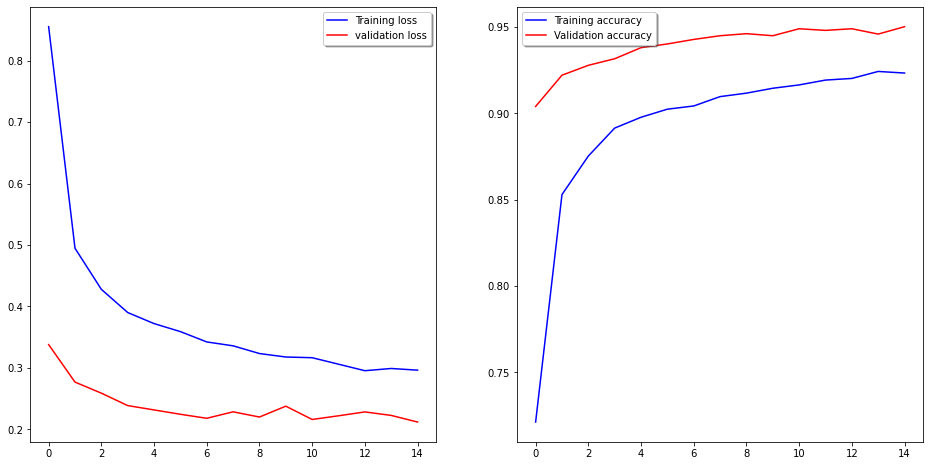

In [51]:
#Vamos ver como foi o treino?

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [52]:
# Testa
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21173347713337057
Test accuracy: 0.9502381


In [53]:
Y[10]

8

In [54]:
# Testando uma entrada qualquer
print(y_train[10])
print(model.predict(x_train[10].reshape((1,784))))
print(model.predict_classes(x_train[10].reshape((1,784))))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[1.9555152e-24 1.8461747e-18 5.5304524e-12 1.0000000e+00 1.9718180e-21
  2.9541872e-11 1.3549638e-25 4.5667366e-15 2.8449191e-14 5.2239158e-16]]
[3]


# Avaliando o Modelo

In [55]:
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       396
           1       0.96      0.99      0.97       488
           2       0.96      0.95      0.95       395
           3       0.97      0.92      0.94       445
           4       0.94      0.95      0.94       441
           5       0.93      0.92      0.93       384
           6       0.97      0.95      0.96       398
           7       0.97      0.96      0.96       428
           8       0.92      0.94      0.93       416
           9       0.92      0.95      0.93       409

    accuracy                           0.95      4200
   macro avg       0.95      0.95      0.95      4200
weighted avg       0.95      0.95      0.95      4200



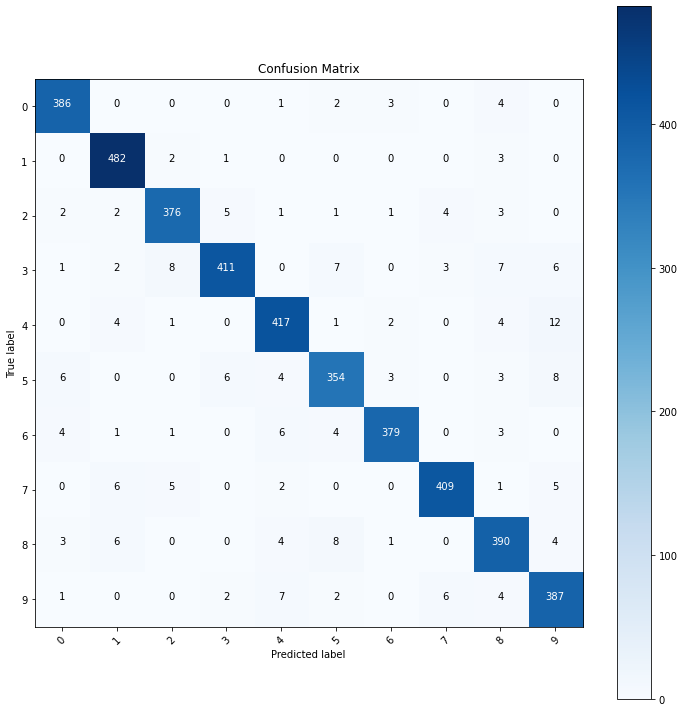

In [56]:
# Vendo alguns reports
# Usando sklearn
import numpy as np

# Classificando toda base de teste
y_pred = model.predict_classes(x_val)
# voltando pro formato de classes
y_test_c = np.argmax(y_val, axis=1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Confution Matrix
cm = confusion_matrix(y_test_c, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, y_pred, target_names=target_names))

# Gerando Saída

Qtde de testes: 28000


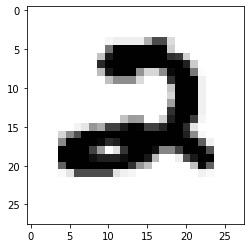

Previsto: 2
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [57]:
# Gerando saída para dataset de teste

#Carrega dataset de teste
test = pd.read_csv("../input/digit-recognizer/test.csv")
print("Qtde de testes: {}".format(len(test)))
# Bota no formato numpy e normaliza
x_test = test.values.reshape(len(test),784)
x_test = x_test.astype('float32')
x_test /= 255

# Faz classificação para dataset de teste
y_pred = model.predict_classes(x_test)

# Verficando algum exemplo
i = 0
plt.imshow(test.values[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Previsto: {}'.format(y_pred[i]))

# Botando no formato de saída (competição Kaggle)
results = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,len(y_pred)+1),name = "ImageId"),results],axis = 1)
print(submission.head(10))
#Salvando Arquivo
submission.to_csv("mlp_mnist_v1.csv",index=False)

# Teste Adicional: Com ruído

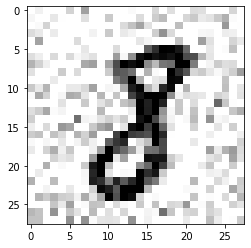

Test loss: 1.6276907827740623
Test accuracy: 0.6647619


In [58]:
#introduzindo ruido
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (4200, 784))
x_te = x_val + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(4200, 28,28)[0], cmap=plt.cm.binary)
plt.show()

# Testa
score = model.evaluate(x_te, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Com ruído, percebemos que a acurácia dos exemplos de validação caiu muito. 
Uma MLP aprende a partir de pixels individuais.
Um modelo Convolucional (CNN) captura melhor regiões, ou padrões espaciais de pixels.
Veja o exemplo com CNN.